# Angular Distribution

In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Atmospheric Neutrinos

In [2]:
f = ROOT.TFile.Open('/Users/yuntse/data/dune/ae/boostedDM/atm_hA_BR.root')

- reco: `ana/Atm` the events with at least one track or one shower
- true: `ana/AllEvents` all the events

In [3]:
reco = f.Get("ana/Atm")
true = f.Get("ana/AllEvents")

In [4]:
true.Print()

******************************************************************************
*Tree    :AllEvents : AllEvents                                              *
*Entries :  4136500 : Total =      2784542011 bytes  File  Size = 1627858560 *
*        :          : Tree compression factor =   1.71                       *
******************************************************************************
*Br    0 :event     : event/I                                                *
*Entries :  4136500 : Total  Size=   16638843 bytes  File Size  =    6153780 *
*Baskets :      954 : Basket Size=      32000 bytes  Compression=   2.70     *
*............................................................................*
*Br    1 :nGeantParticles_Primaries : nGeantParticles_Primaries/I            *
*Entries :  4136500 : Total  Size=   16658003 bytes  File Size  =    3777715 *
*Baskets :      954 : Basket Size=      32000 bytes  Compression=   4.40     *
*...................................................

In [5]:
nTrue = true.GetEntries()

True neutrino momentum (x, y, z) in the detector coordinate (z-axis along the beam line)

In [6]:
lX = []
lY = []
lZ = []

In [7]:
for t in true:
    iEvt = t.event
    NuMom = t.MCNuMomentum
    lNuMom = len(NuMom)
    if iEvt > nTrue:
        print( f'Event {iEvt} has larger event number!' )
        continue
    if lNuMom > 1:
        print( f'Event {iEvt} has {lNuMom} true neutrinos!' )
    if NuMom[0][0] == 0 and NuMom[0][1] == 0 and NuMom[0][2] == 0:
        print( f'Event {iEvt} has a neutrino with 0 momentum!' )
        continue
    lX.append( NuMom[0][0] )
    lY.append( NuMom[0][1] )
    lZ.append( NuMom[0][2] )

In [8]:
vX = np.array( lX )
vY = np.array( lY )
vZ = np.array( lZ )

vR = np.sqrt( vX**2 + vY**2 + vZ**2 )
vCosTh = vZ/vR
vPhi = np.arctan2(vY, vX)

In [9]:
len(vX)

4136500

In [10]:
np.count_nonzero(vR == 0)

0

In [11]:
vCosTh.min(), vCosTh.max(), vPhi.min(), vPhi.max()

(-0.9999998081915074,
 0.9999995855629237,
 -3.1415924055714872,
 3.141590379820033)

cos$\theta$ and $\phi$ distributions of the true incoming neutrinos

(-3.141592653589793, 3.141592653589793)

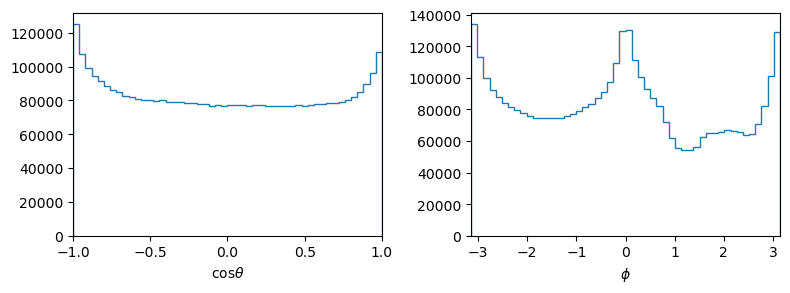

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), layout = 'tight' )
ax[0].hist( vCosTh, bins = np.linspace(-1, 1, 51), histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhi, bins = np.linspace(-np.pi, np.pi, 51), histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

Text(0, 0.5, '$\\phi$')

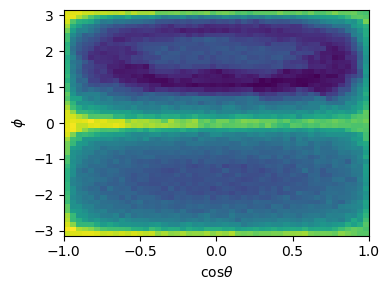

In [13]:
fig, ax = plt.subplots( figsize = (4, 3), layout = 'tight' )
costhBins = np.linspace(-1, 1, 51)
phiBins = np.linspace(-np.pi, np.pi, 51)
ax.hist2d( vCosTh, vPhi, bins = (costhBins, phiBins))
ax.set_xlabel( r'cos$\theta$')
ax.set_ylabel( r'$\phi$')

## Sun Direction

The file has (x, y, z) of the Sun position with respect to the detector coordinate

In [14]:
fSun = 'background_sun_pos.dat'

In [15]:
colnames = ['x', 'y', 'z']
vSun = pd.read_csv( fSun, header = None, sep = r'\s+', names = colnames, usecols = range(3))

In [16]:
vSun['r'] = np.sqrt( vSun['x']**2 + vSun['y']**2 + vSun['z']**2 )
vSun['costh'] = vSun['z']/vSun['r']
vSun['phi'] = np.arctan2( vSun['y'], vSun['x'])

(-3.141592653589793, 3.141592653589793)

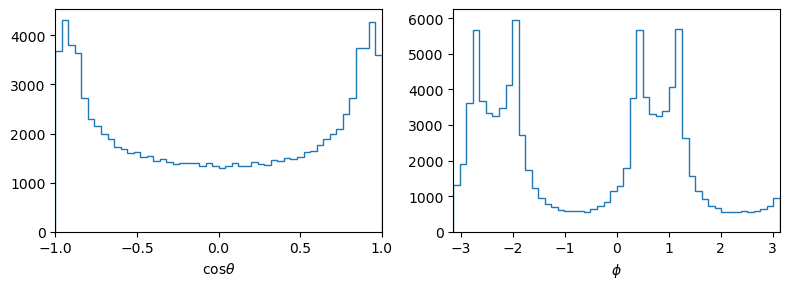

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), layout = 'tight' )
ax[0].hist( vSun['costh'], bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vSun['phi'], bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

Text(0, 0.5, '$\\phi$')

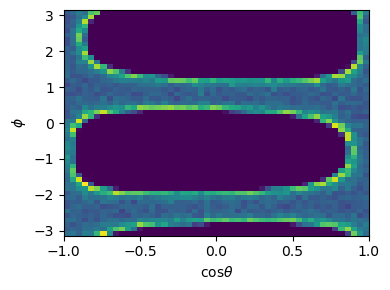

In [18]:
fig, ax = plt.subplots( figsize = (4, 3), layout = 'tight' )

ax.hist2d( vSun['costh'], vSun['phi'], bins = (costhBins, phiBins))
ax.set_xlabel( r'cos$\theta$')
ax.set_ylabel( r'$\phi$')

## Angle between the Sun Direction and the Atmospheric Neutrinos

Randomly assign a Sun direction to each atmospheric neutrino

In [19]:
len(vSun)

100000

In [20]:
iOrder = np.random.randint(0, len(vSun), size = len(vX))

In [21]:
len(iOrder)

4136500

In [22]:
vSunX = np.array(vSun['x'].iloc[iOrder])
vSunY = np.array(vSun['y'].iloc[iOrder])
vSunZ = np.array(vSun['z'].iloc[iOrder])

In [23]:
iOrder[0], iOrder[-1]

(86225, 84773)

In [24]:
vSun['x'].iloc[96875], vSun['x'].iloc[64396]

(-0.0270019, -0.848888)

Calculate the cos$\theta_{Sun}$ - the angle between the Sun and the true atmospheric neutrino 

In [25]:
vSunR = np.sqrt( vSunX**2 + vSunY**2 + vSunZ**2 )
costhSun = (vX*vSunX + vY*vSunY + vZ*vSunZ)/ (vR*vSunR)

We only used ~25000 NC atmospheric neutrinos in the phenomenological study, and let's see what happens with only 25000 events

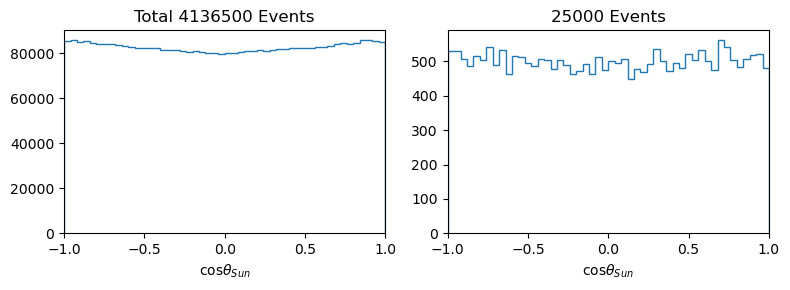

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), layout = 'tight' )
ax[0].hist( costhSun, bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( costhSun[:25000], bins = costhBins, histtype = 'step', label = r'cos$thera$' )

ax[0].set_title( f'Total {nTrue} Events' )
ax[1].set_title( '25000 Events' )
for i in range(2):
    ax[i].set_xlabel( r'cos$\theta_{Sun}$')
    ax[i].set_xlim([-1, 1])

## Honda Flux Coordinate

In [27]:
np.cos(np.pi*7.17/180), np.sin(np.pi*7.17/180)

(0.9921801896421792, 0.12481374636477044)

In [28]:
rotationMat = np.array([[+0.9877, -0.1564, +0.0000],  # new x axis in old coordinates: be nice and fix things (ends up the same)
                        [+0.0000, +0.0000, +1.0000],  # new y axis in old coordinates: vertical
                        [-0.1564, -0.9877, +0.0000]])   # new z axis in old coordinates: away from Batavia, IL

invRotationMat = np.linalg.inv(rotationMat)
invRotationMat

array([[ 0.9876879 ,  0.        , -0.15639808],
       [-0.15639808, -0.        , -0.9876879 ],
       [ 0.        ,  1.        ,  0.        ]])

In [29]:
lHonda = []
for i in range(nTrue):
    vr = np.array([ vX[i], vY[i], vZ[i]])
    vrHonda = np.dot(invRotationMat, vr)
    lHonda.append( vrHonda)
vHonda = np.array(lHonda)
vHonda

array([[-0.41627811, -0.1890864 , -0.30233886],
       [ 0.25137222, -0.24333106, -0.02676794],
       [ 0.34515944,  0.3443509 ,  0.08005871],
       ...,
       [ 0.2471091 ,  0.37960878, -0.08851575],
       [-0.65167378, -0.14469893, -0.23202374],
       [ 0.11227006,  0.11112635, -0.1706468 ]])

In [30]:
vHonda[:,0]

array([-0.41627811,  0.25137222,  0.34515944, ...,  0.2471091 ,
       -0.65167378,  0.11227006])

In [31]:
vRHonda = np.sqrt( vHonda[:,0]**2 + vHonda[:,1]**2 + vHonda[:,2]**2 )
vCosthHonda = vHonda[:,2]/vRHonda
vPhiHonda = np.arctan2(vHonda[:,1], vHonda[:,0])

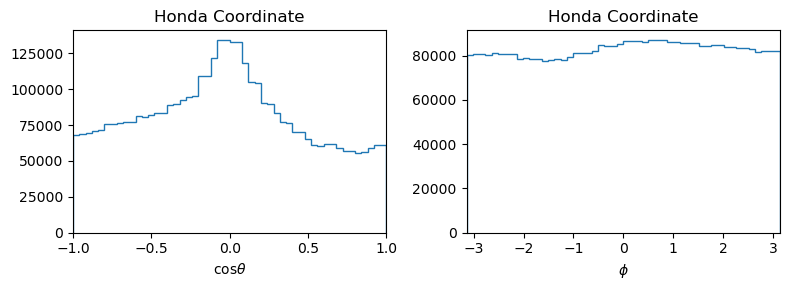

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), layout = 'tight' )
ax[0].hist( vCosthHonda, bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhiHonda, bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

for i in range(2):
    ax[i].set_title('Honda Coordinate')

Text(0.5, 1.0, 'Honda Coordinate')

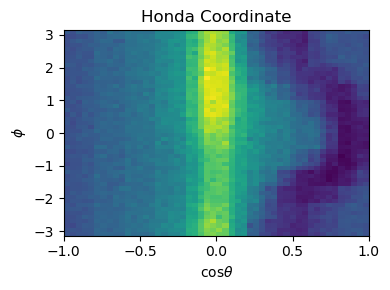

In [33]:
fig, ax = plt.subplots( figsize = (4, 3), layout = 'tight' )

ax.hist2d( vCosthHonda, vPhiHonda, bins = (costhBins, phiBins))
ax.set_xlabel( r'cos$\theta$')
ax.set_ylabel( r'$\phi$')
ax.set_title('Honda Coordinate')

## Atmospheric Neutrinos with Uniform $\phi$ Distribution

Generate $\phi$ uniformly from -$\pi$ to $\pi$

In [34]:
uniPhi = np.random.uniform(-np.pi, np.pi, size = nTrue)

In [35]:
vSinthHonda = np.sqrt( 1 - vCosthHonda**2 )
vUniXHonda = vRHonda*vSinthHonda*np.cos(uniPhi)
vUniYHonda = vRHonda*vSinthHonda*np.sin(uniPhi)

In [36]:
vUniPhiHonda = np.column_stack(( vUniXHonda, vUniYHonda, vHonda[:,2] ))

### Sanity Check on the Fake Honda Distribution

In [37]:
vRUniPhiHondaCheck = np.sqrt( vUniPhiHonda[:,0]**2 + vUniPhiHonda[:,1]**2 + vUniPhiHonda[:,2]**2 )
vCosthUniPhiHondaCheck = vUniPhiHonda[:,2]/vRUniPhiHondaCheck
vPhiUniPhiHondaCheck = np.arctan2(vUniPhiHonda[:,1], vUniPhiHonda[:,0])

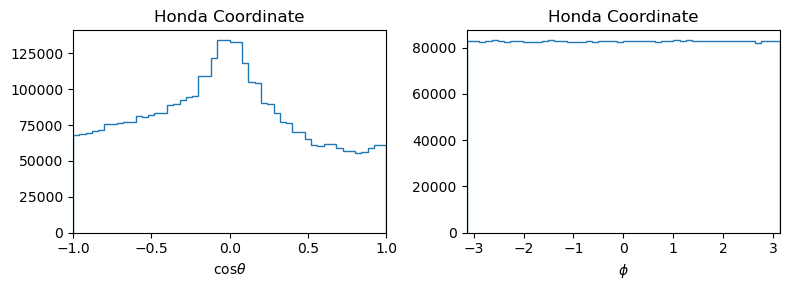

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), layout = 'tight' )
ax[0].hist( vCosthUniPhiHondaCheck, bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhiUniPhiHondaCheck, bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

for i in range(2):
    ax[i].set_title('Honda Coordinate')

Text(0.5, 1.0, 'Honda Coordinate')

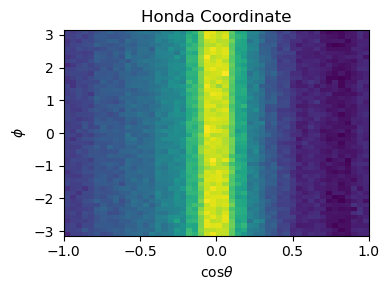

In [39]:
fig, ax = plt.subplots( figsize = (4, 3), layout = 'tight' )

ax.hist2d( vCosthUniPhiHondaCheck, vPhiUniPhiHondaCheck, bins = (costhBins, phiBins))
ax.set_xlabel( r'cos$\theta$')
ax.set_ylabel( r'$\phi$')
ax.set_title('Honda Coordinate')

### Convert to the Detector Coordinate

In [40]:
vUniPhi = np.array([ np.dot(rotationMat, v) for v in vUniPhiHonda ])
vUniPhi

array([[-0.41819385, -0.30233886,  0.18481774],
       [-0.34649916, -0.02676794, -0.04835113],
       [-0.12214832,  0.08005871,  0.47201195],
       ...,
       [-0.17380471, -0.08851575, -0.4182824 ],
       [-0.29724848, -0.23202374,  0.59771674],
       [ 0.15002354, -0.1706468 , -0.04946588]])

In [41]:
vRUniPhi = np.sqrt( vUniPhi[:,0]**2 + vUniPhi[:,1]**2 + vUniPhi[:,2]**2 )
vCosthUniPhi = vUniPhi[:,2]/vRUniPhi
vPhiUniPhi = np.arctan2(vUniPhi[:,1], vUniPhi[:,0])

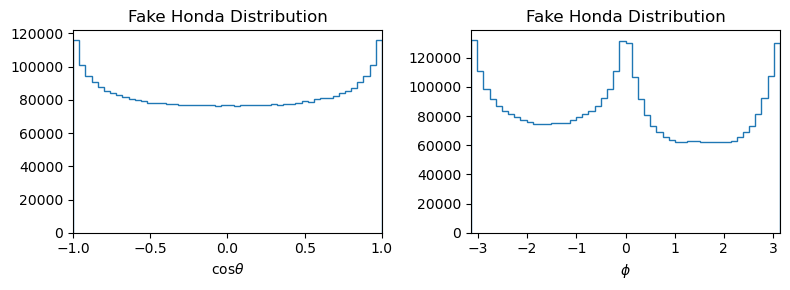

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), layout = 'tight' )
ax[0].hist( vCosthUniPhi, bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhiUniPhi, bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

for i in range(2):
    ax[i].set_title('Fake Honda Distribution')

Text(0.5, 1.0, 'Fake Honda Distribution')

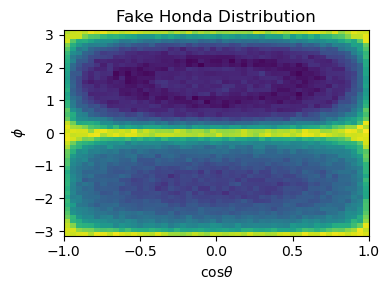

In [43]:
fig, ax = plt.subplots( figsize = (4, 3), layout = 'tight' )

ax.hist2d( vCosthUniPhi, vPhiUniPhi, bins = (costhBins, phiBins))
ax.set_xlabel( r'cos$\theta$')
ax.set_ylabel( r'$\phi$')
ax.set_title('Fake Honda Distribution')

## Angle between the Sun Direction and the Atmospheric Neutrino

Calculate the cos$\theta_{Sun}$ - the angle between the Sun and the true atmospheric neutrino using the arrays above.

In [44]:
costhUniPhiSun = (vUniPhi[:,0]*vSunX + vUniPhi[:,1]*vSunY + vUniPhi[:,2]*vSunZ)/ (vRUniPhi*vSunR)

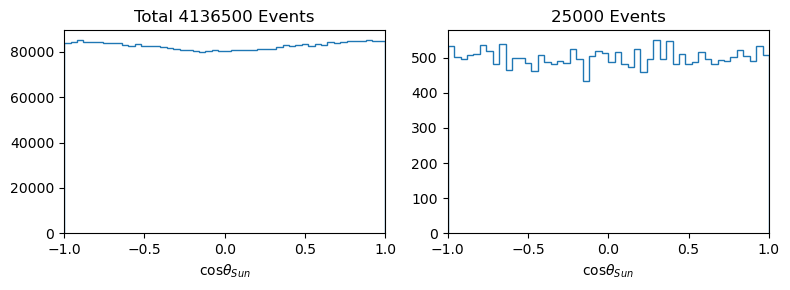

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), layout = 'tight' )
ax[0].hist( costhUniPhiSun, bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( costhUniPhiSun[:25000], bins = costhBins, histtype = 'step', label = r'cos$thera$' )

ax[0].set_title( f'Total {nTrue} Events' )
ax[1].set_title( '25000 Events' )
for i in range(2):
    ax[i].set_xlabel( r'cos$\theta_{Sun}$')
    ax[i].set_xlim([-1, 1])

## The Uniformality of the Angular Distributions

In [46]:
hcosthSun, binEdges = np.histogram(costhSun, bins = costhBins )
hcosthSun.max(), hcosthSun.min(), hcosthSun.min()/hcosthSun.max()

(85938, 79707, 0.9274942400335126)

In [47]:
binEdges

array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
       -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
       -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
        0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
        0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
        0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ])

In [48]:
hcosthUniPhiSun, binEdges = np.histogram( costhUniPhiSun, bins = costhBins )
hcosthUniPhiSun.max(), hcosthUniPhiSun.min(), hcosthUniPhiSun.min()/hcosthUniPhiSun.max()

(85236, 80125, 0.9400370735370032)

With the Honda flux, the non-uniformality is ~7.8%, while with the uniform $\phi$ Honda flux, the non-uniformality is ~6.5%.

## Distributions of Specific Angle Ranges

Investigate the horizontal and vertical atmospherics.

### Upward Going Neutrinos: cos$\theta_{Honda}$ > 0.6

In [49]:
mask1 = (vCosthHonda > 0.6)
mask1

array([False, False, False, ..., False, False, False])

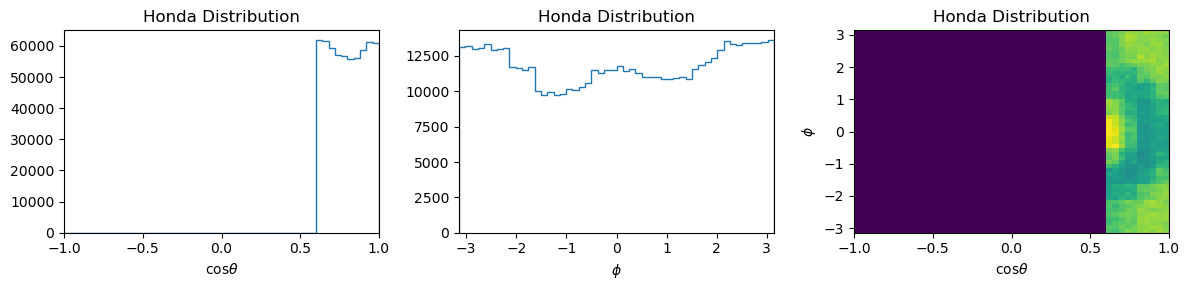

In [50]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3), layout = 'tight' )
ax[0].hist( vCosthHonda[mask1], bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhiHonda[mask1], bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

ax[2].hist2d( vCosthHonda[mask1], vPhiHonda[mask1], bins = (costhBins, phiBins))
ax[2].set_xlabel( r'cos$\theta$')
ax[2].set_ylabel( r'$\phi$')

for i in range(3):
    ax[i].set_title('Honda Distribution')

(-1.0, 1.0)

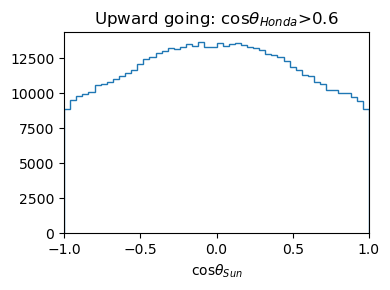

In [51]:
fig, ax = plt.subplots(figsize = (4, 3), layout = 'tight' )
ax.hist( costhSun[mask1], bins = costhBins, histtype = 'step', label = r'cos$thera$' )

ax.set_title( r'Upward going: cos$\theta_{Honda}$>0.6' )
ax.set_xlabel( r'cos$\theta_{Sun}$')
ax.set_xlim([-1, 1])

### Horizontal: |cos$\theta_{Honda}$| < 0.2

In [52]:
mask2 = ( np.abs(vCosthHonda) < 0.2)
mask2

array([False,  True,  True, ...,  True, False, False])

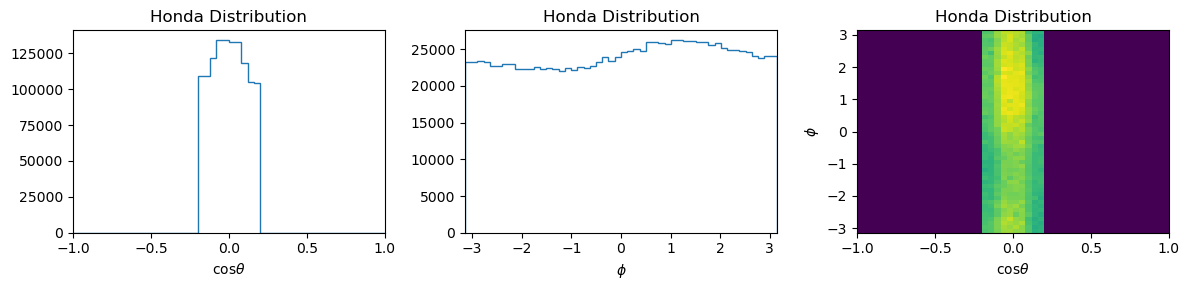

In [53]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3), layout = 'tight' )
ax[0].hist( vCosthHonda[mask2], bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhiHonda[mask2], bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

ax[2].hist2d( vCosthHonda[mask2], vPhiHonda[mask2], bins = (costhBins, phiBins))
ax[2].set_xlabel( r'cos$\theta$')
ax[2].set_ylabel( r'$\phi$')

for i in range(3):
    ax[i].set_title('Honda Distribution')

(-1.0, 1.0)

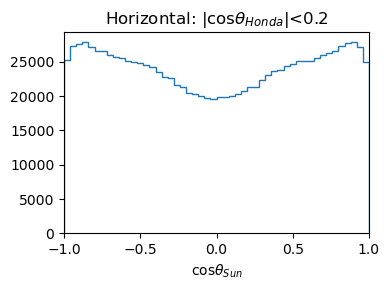

In [54]:
fig, ax = plt.subplots(figsize = (4, 3), layout = 'tight' )
ax.hist( costhSun[mask2], bins = costhBins, histtype = 'step', label = r'cos$thera$' )

ax.set_title( r'Horizontal: |cos$\theta_{Honda}$|<0.2' )
ax.set_xlabel( r'cos$\theta_{Sun}$')
ax.set_xlim([-1, 1])

### Downward Going: cos$\theta_{Honda}$ < -0.6

In [55]:
mask3 = (vCosthHonda < -0.6)
mask3

array([False, False, False, ..., False, False,  True])

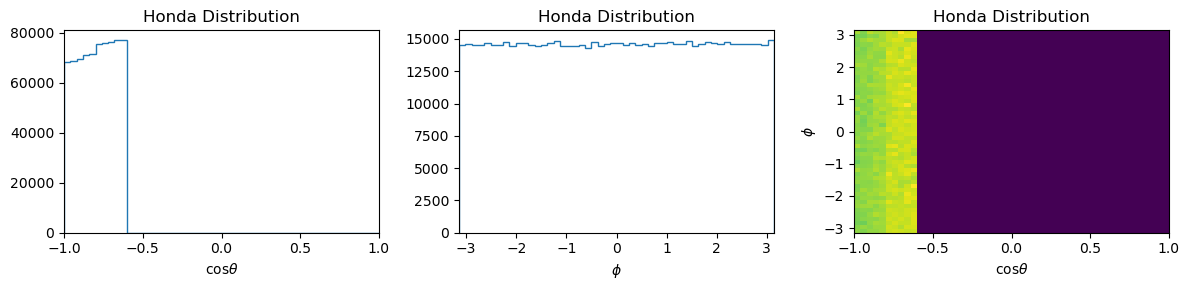

In [56]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3), layout = 'tight' )
ax[0].hist( vCosthHonda[mask3], bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhiHonda[mask3], bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

ax[2].hist2d( vCosthHonda[mask3], vPhiHonda[mask3], bins = (costhBins, phiBins))
ax[2].set_xlabel( r'cos$\theta$')
ax[2].set_ylabel( r'$\phi$')

for i in range(3):
    ax[i].set_title('Honda Distribution')

(-1.0, 1.0)

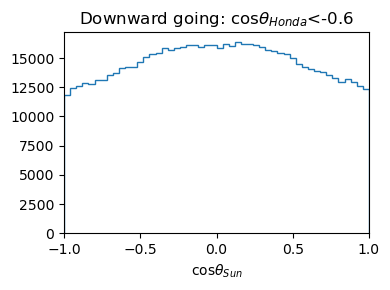

In [57]:
fig, ax = plt.subplots(figsize = (4, 3), layout = 'tight' )
ax.hist( costhSun[mask3], bins = costhBins, histtype = 'step', label = r'cos$thera$' )

ax.set_title( r'Downward going: cos$\theta_{Honda}$<-0.6' )
ax.set_xlabel( r'cos$\theta_{Sun}$')
ax.set_xlim([-1, 1])

### Upward and Downward Going: cos$\theta_{Honda}$ > 0.6 and cos$\theta_{Honda}$ < -0.6

In [58]:
mask4 = (vCosthHonda > 0.6) | (vCosthHonda < -0.6)
mask4

array([False, False, False, ..., False, False,  True])

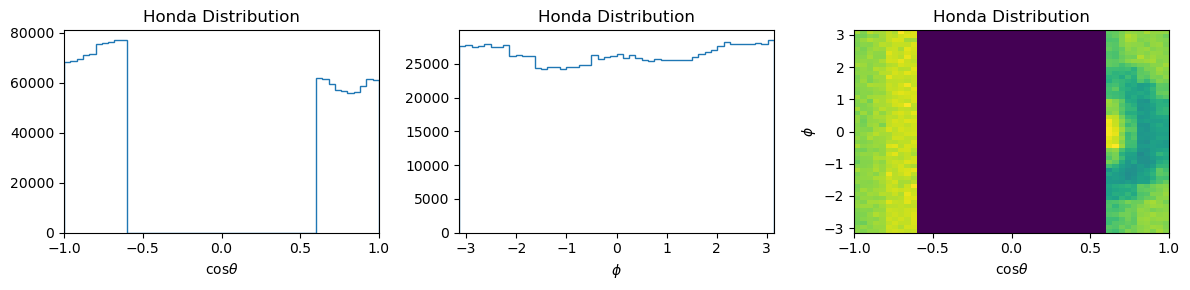

In [59]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3), layout = 'tight' )
ax[0].hist( vCosthHonda[mask4], bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhiHonda[mask4], bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

ax[2].hist2d( vCosthHonda[mask4], vPhiHonda[mask4], bins = (costhBins, phiBins))
ax[2].set_xlabel( r'cos$\theta$')
ax[2].set_ylabel( r'$\phi$')

for i in range(3):
    ax[i].set_title('Honda Distribution')

(-1.0, 1.0)

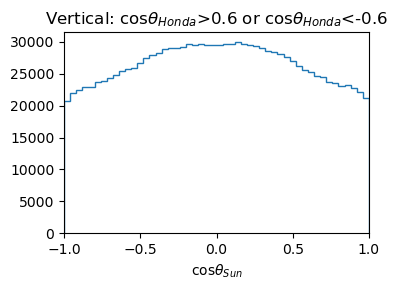

In [60]:
fig, ax = plt.subplots(figsize = (4, 3), layout = 'tight' )
ax.hist( costhSun[mask4], bins = costhBins, histtype = 'step', label = r'cos$thera$' )

ax.set_title( r'Vertical: cos$\theta_{Honda}$>0.6 or cos$\theta_{Honda}$<-0.6' )
ax.set_xlabel( r'cos$\theta_{Sun}$')
ax.set_xlim([-1, 1])

## Symmetric Honda Flux in cos$\theta$

### Randomly Flip the Sign of cos$\theta_{Honda}$

In [61]:
doFlipCosth = np.random.choice([1, -1], size = nTrue)
np.sum(doFlipCosth == 1), np.sum(doFlipCosth == -1), nTrue

(2068023, 2068477, 4136500)

In [65]:
vSymmCosthHondaCosth = vCosthHonda*doFlipCosth

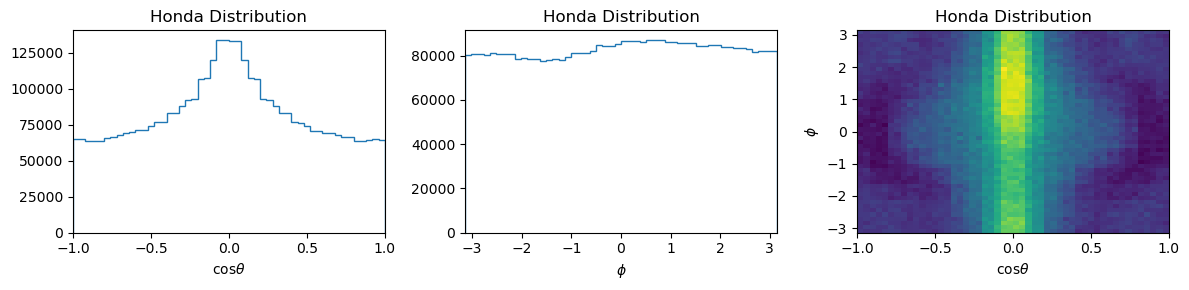

In [66]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3), layout = 'tight' )
ax[0].hist( vSymmCosthHondaCosth, bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhiHonda, bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

ax[2].hist2d( vSymmCosthHondaCosth, vPhiHonda, bins = (costhBins, phiBins))
ax[2].set_xlabel( r'cos$\theta$')
ax[2].set_ylabel( r'$\phi$')

for i in range(3):
    ax[i].set_title('Honda Distribution')

In [64]:
# Calculate (x, y, z) in the Honda coordinate
vXHonda = vRHonda*vSinthHonda*np.cos(vPhiHonda)
vYHonda = vRHonda*vSinthHonda*np.sin(vPhiHonda)

In [67]:
vSymmCosthHonda = np.column_stack(( vXHonda, vYHonda, vHonda[:,2]*doFlipCosth ))

Convert to the detector coordinate

In [68]:
vSymmCosth = np.array([ np.dot(rotationMat, v) for v in vSymmCosthHonda ])

In [69]:
vRSymmCosth = np.sqrt( vSymmCosth[:,0]**2 + vSymmCosth[:,1]**2 + vSymmCosth[:,2]**2 )
vCosthSymmCosth = vSymmCosth[:,2]/vRSymmCosth
vPhiSymmCosth = np.arctan2(vSymmCosth[:,1], vSymmCosth[:,0])

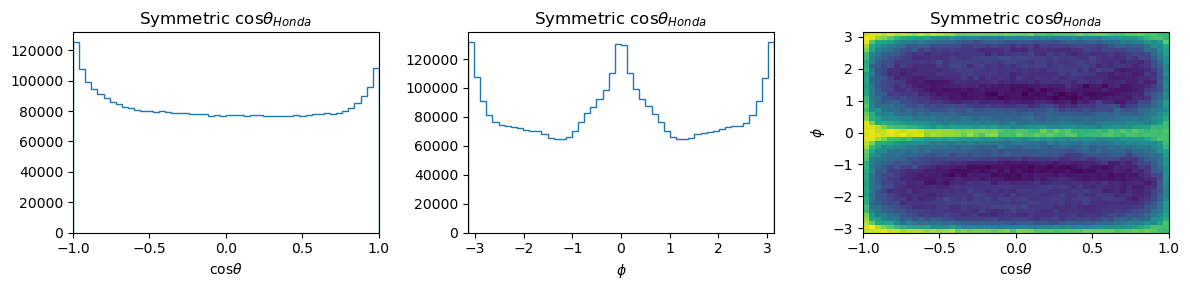

In [70]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3), layout = 'tight' )
ax[0].hist( vCosthSymmCosth, bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( vPhiSymmCosth, bins = phiBins, histtype = 'step', label = r'$phi$' )

ax[0].set_xlabel( r'cos$\theta$')
ax[1].set_xlabel( r'$\phi$' )
ax[0].set_xlim([-1, 1])
ax[1].set_xlim([-np.pi, np.pi])

ax[2].hist2d( vCosthSymmCosth, vPhiSymmCosth, bins = (costhBins, phiBins))
ax[2].set_xlabel( r'cos$\theta$')
ax[2].set_ylabel( r'$\phi$')

for i in range(3):
    ax[i].set_title(r'Symmetric cos$\theta_{Honda}$')

Angle between atmospheric neutrinos and the sun

In [71]:
costhSymmCosthSun = (vSymmCosth[:,0]*vSunX + vSymmCosth[:,1]*vSunY + vSymmCosth[:,2]*vSunZ)/ (vRSymmCosth*vSunR)

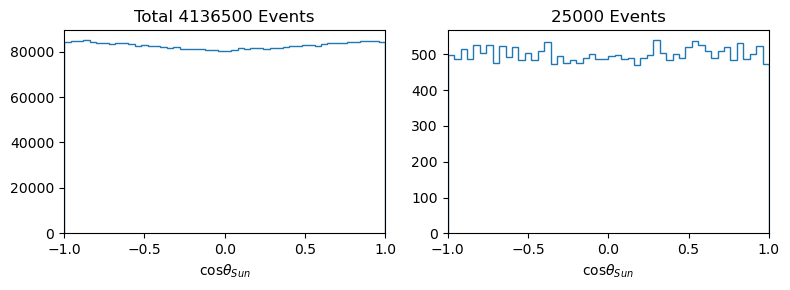

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), layout = 'tight' )
ax[0].hist( costhSymmCosthSun, bins = costhBins, histtype = 'step', label = r'cos$thera$' )
ax[1].hist( costhSymmCosthSun[:25000], bins = costhBins, histtype = 'step', label = r'cos$thera$' )

ax[0].set_title( f'Total {nTrue} Events' )
ax[1].set_title( '25000 Events' )
for i in range(2):
    ax[i].set_xlabel( r'cos$\theta_{Sun}$')
    ax[i].set_xlim([-1, 1])

Uniformality

In [73]:
hcosthSymmCosthSun, binEdges = np.histogram(costhSymmCosthSun, bins = costhBins )
hcosthSymmCosthSun.min(), hcosthSymmCosthSun.max(), hcosthSymmCosthSun.min()/hcosthSymmCosthSun.max()

(80160, 85119, 0.9417403869876291)